# Read training data file

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import utils

In [2]:
print('Reading Data...')
data = pd.read_csv('train_minimal_128.csv',header = 0, index_col=0)
data.head()

Reading Data...


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,000016.jpg,-1,-1,1,-1,0,23,23,23,23,...,29,30,30,30,31,32,33,34,33,32
1,000025.jpg,-1,-1,-1,-1,0,85,89,88,81,...,79,75,77,71,72,75,77,82,81,75
2,000026.jpg,-1,-1,-1,-1,0,172,169,175,184,...,74,96,96,99,112,129,122,87,61,62
3,000028.jpg,-1,-1,1,-1,0,233,231,231,234,...,178,184,187,186,191,191,193,191,187,187
4,000037.jpg,-1,-1,-1,1,0,77,76,74,73,...,57,57,57,57,57,57,57,57,57,57


In [3]:
X_train = data.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1)
#X_train = X_train.astype(np.float64)
#X_train = X_train.values/ 255.0
#X_train = np.array(X_train)

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale

mean = np.std(X_train).astype(np.int64)
X_train -= mean
X_train = (X_train.values).astype('float64')

In [4]:
Y_train = data[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
Y_train = Y_train.apply(utils.create_labels, axis = 1)
Y_train.value_counts()

Mustache_      2000
Wearing_Hat    2000
Eyeglasses_    2000
Neutral        2000
Smiling_       2000
dtype: int64

# Train model

In [5]:
from sklearn.neural_network import MLPClassifier

start_time = time.clock()

# build the classifier
clf=MLPClassifier(random_state=0,hidden_layer_sizes=(1024,128),activation='relu',batch_size=50, learning_rate='adaptive',
                  max_iter=200, verbose=True,early_stopping=False)
clf.fit(X_train,Y_train)

print(clf.score(X_train,Y_train))

Iteration 1, loss = 1.88527947
Iteration 2, loss = 1.09811757
Iteration 3, loss = 0.95548728
Iteration 4, loss = 0.93991966
Iteration 5, loss = 0.84508525
Iteration 6, loss = 0.81222890
Iteration 7, loss = 0.78925120
Iteration 8, loss = 0.76548229
Iteration 9, loss = 0.78886221
Iteration 10, loss = 0.72093308
Iteration 11, loss = 0.71373241
Iteration 12, loss = 0.70461126
Iteration 13, loss = 0.70559190
Iteration 14, loss = 0.68541477
Iteration 15, loss = 0.68080606
Iteration 16, loss = 0.63559949
Iteration 17, loss = 0.64026332
Iteration 18, loss = 0.59477336
Iteration 19, loss = 0.58371767
Iteration 20, loss = 0.59985030
Iteration 21, loss = 0.60728895
Iteration 22, loss = 0.58988476
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.7993


In [6]:
time_sec = time.clock() - start_time
m, s = divmod(time_sec, 60)
h, m = divmod(m, 60)
print ("Training time: %d:%02d:%02d" % (h, m, s))

Training time: 1:35:49


In [ ]:
import pickle
# save the model to disk
filename = 'MLP_finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# load the model from disk
#clf = pickle.load(open(filename, 'rb'))
#clf.score(X, Y)

# Verify model

In [7]:
# read training data and test data
data_verify = pd.read_csv('verify_minimal_128.csv',header = 0, index_col=0)
data_verify.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,162783.jpg,-1,-1,-1,-1,1,206,206,206,206,...,214,215,216,215,215,214,213,213,213,213
1,162807.jpg,1,-1,-1,-1,1,100,101,93,80,...,33,28,31,33,30,30,37,38,34,33
2,162813.jpg,-1,-1,1,-1,1,58,58,56,57,...,41,40,40,40,41,42,43,43,43,43
3,162827.jpg,-1,-1,-1,-1,1,79,77,77,80,...,176,199,196,188,168,143,145,150,170,180
4,162844.jpg,-1,-1,-1,1,1,42,42,42,42,...,204,204,204,204,204,205,206,206,206,206


In [8]:
X_verify = data_verify.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1)
#X_train = X_train.astype(np.float64)
#X_train = X_train.values/ 255.0
#X_train = np.array(X_train)

# pre-processing: divide by max and substract mean
scale = np.max(X_verify)
X_verify /= scale

mean = np.std(X_verify).astype(np.int64)
X_verify -= mean
X_verify = (X_verify.values).astype('float64')

In [9]:
Y_verify = data_verify[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
Y_verify = Y_verify.apply(utils.create_labels, axis = 1)
Y_verify.value_counts()

Mustache_      400
Wearing_Hat    400
Smiling_       400
Neutral        400
Eyeglasses_    400
dtype: int64

In [35]:
X_train.shape

(10000L, 16384L)

In [30]:
Y_verify.shape

(2000L,)

In [10]:
print ("Accuracy on verification set:", clf.score(X_verify,Y_verify))

('Accuracy on verification set:', 0.72950000000000004)


In [ ]:
import pickle
clf=MLPClassifier(random_state=0,hidden_layer_sizes=1000,activation='logistic',max_iter=100)
# load the model from disk
filename = 'MLP_finalized_model.sav'
clf = pickle.load(open(filename, 'rb'))
print ("Accuracy on verification set:", clf.score(X_test,Y_test_labels))

In [28]:
clf.predict(X.iloc[0])

NameError: name 'X' is not defined

['Mustache_']


C:\Coursera\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


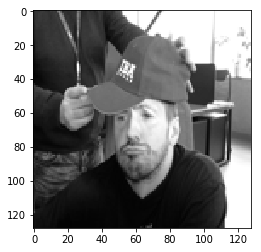

In [27]:
import matplotlib.pyplot as plt
import os
from PIL import Image
dirname = '../real_images/'
im_file ='Picture 9.jpg'

image = Image.open(os.path.join(dirname, im_file))

image = image.convert('L')
image = image.resize((128, 128),Image.BICUBIC)
image.load()
image = np.array(image)
image = image.reshape(16384)

im = image
print(clf.predict(im))

image =im.reshape(128,128)
plt.imshow(image, cmap='gray')
plt.show()   